In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
num_tags=12
num_words=10000
num_departaments=4

def build_model():
    
    title_input=keras.Input(shape=(None,),name="title")
    body_input=keras.Input(shape=(None,),name="body")
    tags_input=keras.Input(shape=(num_tags,),name="tags")
    #Ingresar cada palabra del titulo en un vector de 64 dimensiones
    title_feature=tf.keras.layers.Embedding(num_words,64)(title_input)
    #ingresa cada palabra del texto en un vector de 64 dimensiones
    body_features=tf.keras.layers.Embedding(num_words,64)(body_input)
    #reduce la secuencia de palbras ingresadas en el titulo en un solo vector
    title_feature=tf.keras.layers.LSTM(128)(title_feature)
    body_features=tf.keras.layers.LSTM(32)(body_features)
    #combina todas las funciones disponibles en un solo vector grande mediante
    x=tf.keras.layers.concatenate([title_feature,body_features,tags_input])
    #regresion logistica para prediccion de probabilidad
    priority_pred=tf.keras.layers.Dense(1,activation="sigmoid",name="priority")(x)

    departament_pred=tf.keras.layers.Dense(num_departaments,activation="softmax",name="departament")(x)

    #instanciacion del modelo extremo a exremo que prediga la prioridad como el deparatamento

    model=tf.keras.Model(inputs=[title_input,body_input,tags_input],
                         outputs=[priority_pred,departament_pred]
                        )

    model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-3),
              loss={"priority":"binary_crossentropy",
                    "departament":"categorical_crossentropy"
                   },
              loss_weights=[1.0,0.2],
              metrics={"priority":"accuracy","departament":"accuracy"}
             )
    return model


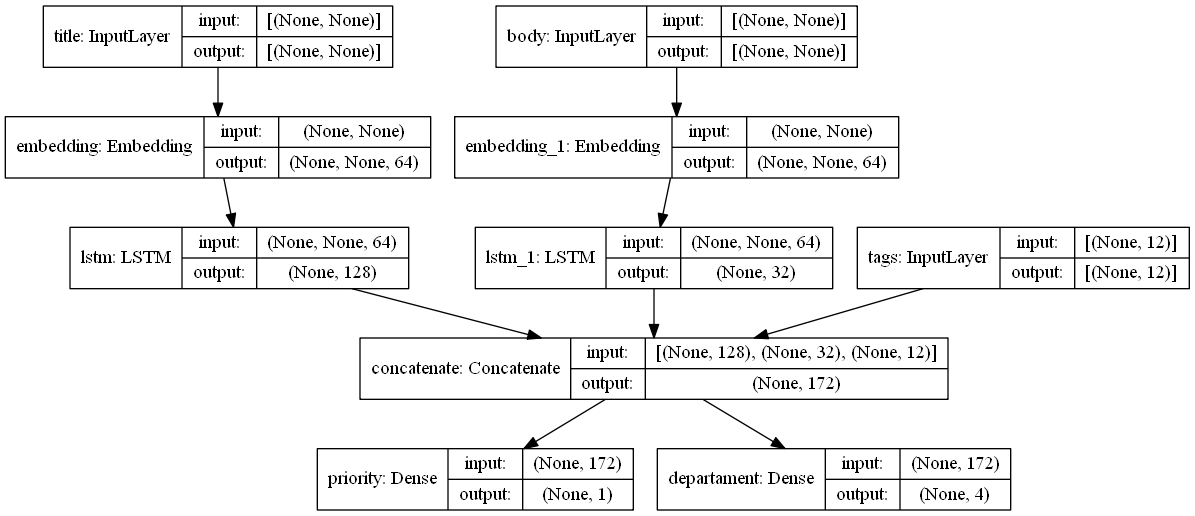

In [3]:
model=build_model()
tf.keras.utils.plot_model(model,"multi_input_output_model.png",show_shapes=True)

In [4]:
#podemos entrenar el modelo pasando listas de matrices Numpy de entradas y objetivos
n_samples=1000
title_data=np.random.randint(num_words,size=(n_samples,10))
body_data=np.random.randint(num_words,size=(n_samples,100))
tags_data=np.random.randint(2,size=(n_samples,num_tags)).astype("float32")

In [5]:
#datos de objetivo ficticios

priority_targets=np.random.random(size=(n_samples,1))
dept_targets=np.random.randint(2,size=(n_samples,num_departaments))

In [6]:
history=model.fit({"title":title_data,"body":body_data,"tags":tags_data},
          {"priority":priority_targets,"departament":dept_targets},
          batch_size=32,
          epochs=10
         )

Epoch 1/10
32/32 [==============================] - 9s 74ms/step - loss: 1.2783 - priority_loss: 0.7010 - departament_loss: 2.8865 - priority_accuracy: 0.0000e+00 - departament_accuracy: 0.3260
Epoch 2/10
32/32 [==============================] - 3s 79ms/step - loss: 1.2736 - priority_loss: 0.7009 - departament_loss: 2.8637 - priority_accuracy: 0.0000e+00 - departament_accuracy: 0.5440
Epoch 3/10
32/32 [==============================] - 3s 81ms/step - loss: 1.2509 - priority_loss: 0.6989 - departament_loss: 2.7599 - priority_accuracy: 0.0000e+00 - departament_accuracy: 0.4640
Epoch 4/10
32/32 [==============================] - 3s 82ms/step - loss: 1.2748 - priority_loss: 0.7026 - departament_loss: 2.8609 - priority_accuracy: 0.0000e+00 - departament_accuracy: 0.4312
Epoch 5/10
32/32 [==============================] - 3s 82ms/step - loss: 1.2606 - priority_loss: 0.6999 - departament_loss: 2.8036 - priority_accuracy: 0.0000e+00 - departament_accuracy: 0.3890
Epoch 6/10
32/32 [============

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
body (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 64)     640000      title[0][0]                      
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 64)     640000      body[0][0]                       
______________________________________________________________________________________________